## ODE

$$ \dfrac{d^2y}{dt^2} = -y + g(t) $$

The odient function can only solve ODEs of the form

$$ \dfrac{dy}{dt} = F(y, t) $$

Reformulate it as a system of coupled first-order equations. First, define two new variables that will be the components of he vector $y$.

$$ y_1 = y $$

$$ y_2 = \dfrac{dy_1}{dt} $$

Next, write the derivatives of $y_1$ and $y_2$ in terms of $y_1$, $y_2$ and $t$.

$$ \dfrac{dy_1}{dt} = \dfrac{dy}{dt} = y_2 $$

$$ \dfrac{dy_2}{dt} = \dfrac{d^2y}{dt^2} = -y + g = -y_1 + g $$

This allows us to cast our problem, a second-order DE, in the form required by odeint. Here, $y$ is an array with two entries, and $F(y,t)$ returns an array with two entries:

\begin{equation}
F(y,t) = \begin{vmatrix} y_2 \\ -y_1 + g \end{vmatrix}
\end{equation}

The general function call is: $y = odient(F, y0, t)$

$F$ - A function $F(y, t)$

$y0$ - A one-dimensional array with the initial values of $y$

$t$ - An array of t values at which $y$ is to be computed.  The first entry of this array is the time at which the initial values of $y0$ apply.

$y$ - An aray of the values of $y(t)$ at the points specified in $t$.

In [1]:
# Motion of an undriven harmonic oscillator 

def F(y, t):
    '''
    Return derivatives for 2nd-order ODE y''= -y
    '''
    
    dy = [0, 0] # Create a list to store derivatives
    dy[0] = y[1] # Store first derivative of y(t)
    dy[1] = -y[0] # Store second derivative of y(t)
    return dy

import numpy as np, matplotlib.pyplot as plt
from scipy.integrate import odeint

# Create array of time values to study:
t_min = 0; t_max = 10; dt = 0.1
t = np.arange(t_min, t_max+dt, dt)

# Provide two sets of initial conditions:
initial_conditions = [ (1.0, 0.0), (0.0, 1.0) ]

plt.figure()
for y0 in initial_conditions:
    y = odeint(F, y0, t)
    plt.plot(y, y[:, 0], linewidth=2)
    
skip = 5
t_test = t[::skip] # Compare at a subset of points.
plt.plot(t_test, np.cos(t_test), 'bo') # Exact solution for y0 = (1, 0)
plt.plot(t_test, np.sin(t_test), 'go') # Exact solution for y0 = (0, 1)

### First-order equations [1]

Let's try a first-order ordinary differential equation (ODE), say:
$$\frac{dy}{dx}+y=x \qquad y(0)=1$$
 
This has a closed-form solution
$$y=x−1+2e^{−x}$$  

In [14]:
from scipy.integrate import odeint

# Define a function which calculates the derivative
def dy_dx(y, x):
    return x - y

xs = np.linspace(0,5,100)
y0 = 1.0  # the initial condition
ys = odeint(dy_dx, y0, xs) # Returns a multidimensional array.
ys = np.array(ys).flatten() # Flatten converts multidimensional array into a vector

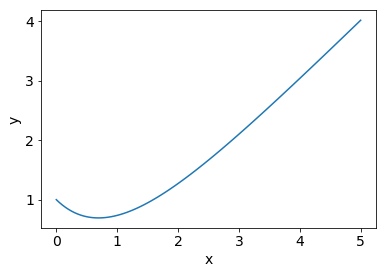

In [3]:
# Plot the numerical solution
plt.rcParams.update({'font.size': 14})  # increase the font size
plt.xlabel("x")
plt.ylabel("y")
plt.plot(xs, ys);

Compare the numerical solution with the analytical solution by showing both on the same plot

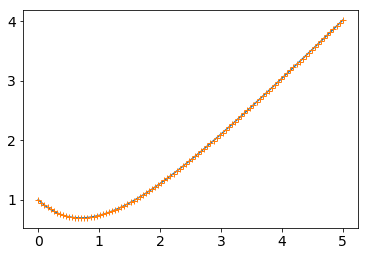

In [4]:
y_exact = xs - 1 + 2*np.exp(-xs)
y_difference = ys - y_exact
plt.plot(xs, ys, xs, y_exact, "+");

Now take a look at the difference between the two series:

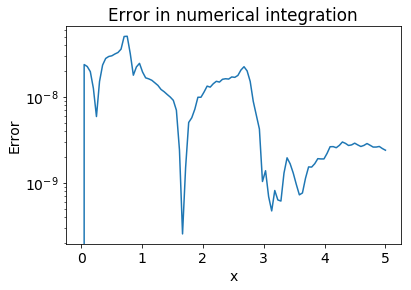

In [5]:
y_diff = np.abs(y_exact - ys)
plt.semilogy(xs, y_diff)
plt.ylabel("Error")
plt.xlabel("x")
plt.title("Error in numerical integration");
# Note the logarithmic scale on the y-axis. 

Exercise: Experiment with the options of "odeint" to improve the accuracy of the integration.

Second-order ordinary differential equations
Suppose we have a second-order ODE such as a damped simple harmonic motion equation,
$$y^{''}+2y^{′}+2y=cos(2x) \qquad y(0)=0 \qquad y^{′}(0)=0$$
 
We can turn this into two first-order equations by defining a new depedent variable. For example,
$$z≡y^{′}⇒z^{′}+2z+2y=cos(2x) \qquad z(0)=y(0)=0$$
 
We can solve this system of ODEs using "odeint" with lists, as follows:

In [19]:
def dU_dx(U, x):
    # Here U is a vector such that y=U[0] and z=U[1]. This function should return [y', z']
    return [U[1], -2*U[1] - 2*U[0] + np.cos(2*x)]
U0 = [0, 0]
xs = np.linspace(0, 10, 200)
Us = odeint(dU_dx, U0, xs)
ys = Us[:,0] # Means [first row: last row , column] ie [:,0] gives all of fist column

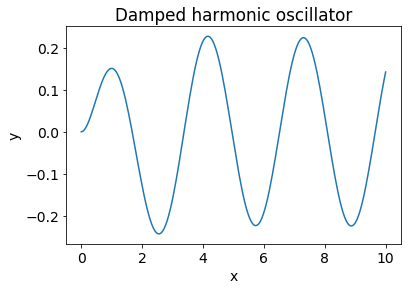

In [7]:
plt.xlabel("x")
plt.ylabel("y")
plt.title("Damped harmonic oscillator")
plt.plot(xs,ys);

Predator-Prey Equations
Also known as Lotka-Volterra equations, the predator-prey equations are a pair of first-order non-linear ordinary differential equations. They represent a simplified model of the change in populations of two species which interact via predation. For example, foxes (predators) and rabbits (prey). Let  x  and  y represent rabbit and fox populations, respectively. Then
$$\frac{dx}{dt}=x(a−by) \qquad \frac{dy}{dt}=−y(c−dx)$$
 
Here  a ,  b ,  c  and  d  are parameters, which are assumed to be positive.

In [8]:
a,b,c,d = 1,1,1,1

def dP_dt(P, t):
    return [P[0]*(a - b*P[1]), -P[1]*(c - d*P[0])]

ts = np.linspace(0, 12, 100)
P0 = [1.5, 1.0]
Ps = odeint(dP_dt, P0, ts)
prey = Ps[:,0]
predators = Ps[:,1]

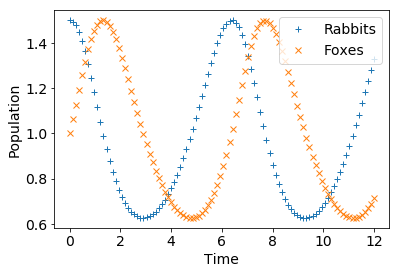

In [9]:
plt.plot(ts, prey, "+", label="Rabbits")
plt.plot(ts, predators, "x", label="Foxes")
plt.xlabel("Time")
plt.ylabel("Population")
plt.legend();

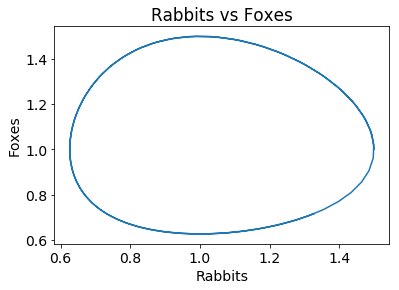

In [10]:
plt.plot(prey, predators, "-")
plt.xlabel("Rabbits")
plt.ylabel("Foxes")
plt.title("Rabbits vs Foxes");

The plot above illustrates that the system is periodic. Let's plot a few more curves in the phase space.

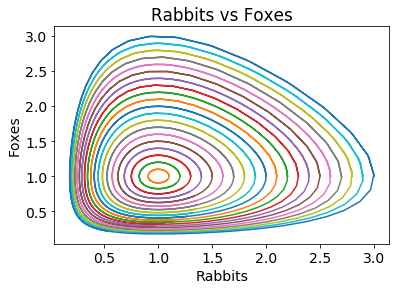

In [11]:
ic = np.linspace(1.0, 3.0, 21)
for r in ic:
    P0 = [r, 1.0]
    Ps = odeint(dP_dt, P0, ts)
    plt.plot(Ps[:,0], Ps[:,1], "-")
plt.xlabel("Rabbits")
plt.ylabel("Foxes")
plt.title("Rabbits vs Foxes");

### References

[1] http://sam-dolan.staff.shef.ac.uk/mas212/notebooks/ODE_Example.html